In [1]:
import numpy as np
import pandas as pd
import sklearn
from matplotlib import pyplot as plt
from pandas.plotting import table

GSM

In [82]:
gsm = pd.read_csv('ICCS - CSLAB Analysis/network_stats/gsm.csv', usecols=lambda x: x not in ['BSC_NAME', 'CELL_ID'])
gsm.isna().sum()

PERIOD_START_TIME       0
BTS_NAME                0
INCOMING_HO_SEIZURES    0
CALL_REQUESTS           0
TCH_NORMAL_SEIZURES     0
TCSH_TRAFFIC            0
TCH_CONGESTION          0
TCH_BLOCKING            0
ULRLC                   0
ULRLCEDGE               0
DLRLC                   0
DLRLCEDGE               0
dtype: int64

In [83]:
gsm.head(10)

,PERIOD_START_TIME,BTS_NAME,INCOMING_HO_SEIZURES,CALL_REQUESTS,TCH_NORMAL_SEIZURES,TCSH_TRAFFIC,TCH_CONGESTION,TCH_BLOCKING,ULRLC,ULRLCEDGE,DLRLC,DLRLCEDGE
0,2022-06-22 00:00:00,G00005A1,0,3,3,0.13,0.0,0.0,0.00,0.04,0.00,0.01
1,2022-06-22 00:00:00,G00005A2,1,18,18,0.96,0.0,0.0,0.06,4.50,0.05,11.93
2,2022-06-22 00:00:00,G00005A3,0,11,11,1.95,0.0,0.0,0.07,0.92,0.05,0.85
3,2022-06-22 00:00:00,G00005A4,2,21,21,1.83,0.0,0.0,0.16,1.63,0.14,1.64
4,2022-06-22 00:00:00,G00005A5,0,13,13,3.79,0.0,0.0,0.11,11.60,0.09,56.91
5,2022-06-22 00:00:00,G00005Z1,1,5,5,0.48,0.0,0.0,0.02,2.74,0.01,4.30
6,2022-06-22 00:00:00,G00005Z2,5,77,77,5.34,0.0,0.0,0.09,0.46,0.12,1.01
7,2022-06-22 00:00:00,G00005Z3,0,15,15,1.70,0.0,0.0,0.00,0.18,0.00,0.13
8,2022-06-22 00:00:00,G00005Z4,2,141,140,7.61,0.0,0.0,0.03,1.90,0.02,1.70
9,2022-06-22 00:00:00,G00005Z5,0,131,131,9.32,0.0,0.0,0.04,4.22,0.02,13.54


In [84]:
gsm.shape[0]

405920

In [85]:
gsm['ID'] = gsm['BTS_NAME'].apply(lambda x : x[1:-2].strip('0')).astype(int)
gsm = gsm.loc[:, gsm.columns != 'BTS_NAME']
gsm['PERIOD_START_TIME'] = pd.to_datetime(gsm['PERIOD_START_TIME'], format='%Y-%m-%d %H:%M:%S')
gsm.set_index(['ID','PERIOD_START_TIME'], inplace=True)
gsm = gsm.groupby([pd.Grouper(level='ID'), pd.Grouper(freq='H', level='PERIOD_START_TIME', closed='left')]).sum()
gsm.head()

INCOMING_HO_SEIZURES  CALL_REQUESTS  \
ID PERIOD_START_TIME                                          
5  2021-12-16 00:00:00                     4            434   
   2021-12-16 01:00:00                     4            195   
   2021-12-16 02:00:00                     7            109   
   2021-12-16 03:00:00                     2             79   
   2021-12-16 04:00:00                     0             72   

                        TCH_NORMAL_SEIZURES  TCSH_TRAFFIC  TCH_CONGESTION  \
ID PERIOD_START_TIME                                                        
5  2021-12-16 00:00:00                  432         28.49             0.0   
   2021-12-16 01:00:00                  195         14.63             0.0   
   2021-12-16 02:00:00                  109          7.93             0.0   
   2021-12-16 03:00:00                   79          2.48             0.0   
   2021-12-16 04:00:00                   72          1.73             0.0   

                        TCH_BLOCKING  ULRLC  ULRLCEDGE  DLRLC  DLRLCEDGE  
ID PERIOD_START_TIME                                                      
5  2021-12-16 00:00:00           0.0   0.60      31.65   0.43      77.84  
   2021-12-16 01:00:00           0.0   0.42      26.04   0.33      58.03  
   2021-12-16 02:00:00           0.0   0.56      19.82   0.37      59.46  
   2021-12-16 03:00:00           0.0   0.80      19.20   0.34      36.97  
   2021-12-16 04:00:00           0.0   0.42      12.21   0.37      40.43

Average Metrics per Weekday

In [86]:
print(gsm.reset_index().groupby(by='ID').count()['ULRLC'])
print(gsm.reset_index().PERIOD_START_TIME.unique().size)
print(gsm.reset_index().ID.unique())

ID
5       5711
53      5687
56      5711
67      5711
89      5750
589     5686
703     5750
739     5750
2577    5711
2909    5686
2935    5750
Name: ULRLC, dtype: int64
5783
[   5   53   56   67   89  589  703  739 2577 2909 2935]


In [87]:
gsm.shape[0]

62903

LTE

In [88]:
lte = pd.read_csv('ICCS - CSLAB Analysis/network_stats/lte.csv')
lte.isna().sum()

PERIOD_START_TIME          0
ENODEBID                   0
ENB_NAME                   0
CELLNAME                   0
CELLID                     0
ECI                        0
VOLTE_CALLMINUTES    1541872
LTE_DL_TRAFFIC          5534
LTE_UL_TRAFFIC        104798
LTE_CA_TRAFFIC          5534
DL_THROUGHPUT           5534
UL_THROUGHPUT           5534
dtype: int64

In [89]:
lte.head(10)

,PERIOD_START_TIME,ENODEBID,ENB_NAME,CELLNAME,CELLID,ECI,VOLTE_CALLMINUTES,LTE_DL_TRAFFIC,LTE_UL_TRAFFIC,LTE_CA_TRAFFIC,DL_THROUGHPUT,UL_THROUGHPUT
0,2022-06-22 00:00:00,5,EGALEO,L100005A1,51,25601281,15.48,618.77,105.21,524.73,39.40,1.88
1,2022-06-22 00:00:00,5,EGALEO,L100005A2,52,25601282,7.48,867.97,128.24,713.44,9.70,0.92
2,2022-06-22 00:00:00,5,EGALEO,L100005A3,53,25601283,71.58,934.06,85.40,849.40,16.17,1.03
3,2022-06-22 00:00:00,5,EGALEO,L100005A4,54,25601284,79.27,1069.86,83.85,810.75,12.06,0.20
4,2022-06-22 00:00:00,5,EGALEO,L100005B1,511,25601291,4.10,765.84,82.65,719.90,22.44,1.53
5,2022-06-22 00:00:00,5,EGALEO,L100005B2,512,25601292,5.15,178.65,24.08,139.33,16.41,0.94
6,2022-06-22 00:00:00,5,EGALEO,L100005B3,513,25601293,1.03,706.49,126.80,365.04,5.68,0.45
7,2022-06-22 00:00:00,5,EGALEO,L100005B4,514,25601294,10.53,2402.75,128.44,1005.01,16.74,1.01
8,2022-06-22 00:00:00,5,EGALEO,L100005K1,541,25601321,7.50,857.22,59.67,622.01,28.76,2.66
9,2022-06-22 00:00:00,5,EGALEO,L100005K2,542,25601322,16.13,2391.28,33.76,443.59,12.45,1.62


In [90]:
lte.shape[0]

4825601

In [91]:
lte.fillna(0)
lte.rename(columns={'ENODEBID':'ID'}, inplace=True)
lte = lte.loc[:, ~lte.columns.isin(['ENB_NAME', 'CELLNAME', 'CELLID', 'ECI'])]
lte['PERIOD_START_TIME'] = pd.to_datetime(lte['PERIOD_START_TIME'], format='%Y-%m-%d %H:%M:%S')
lte.set_index(['ID','PERIOD_START_TIME'], inplace=True)
lte = lte.groupby([pd.Grouper(level='ID'), pd.Grouper(freq='H', level='PERIOD_START_TIME', closed='left')]).sum()
lte.head()

VOLTE_CALLMINUTES  LTE_DL_TRAFFIC  LTE_UL_TRAFFIC  \
ID PERIOD_START_TIME                                                        
5  2021-12-16 00:00:00            1114.56       108663.56        10751.81   
   2021-12-16 01:00:00             454.86        77409.15         9174.66   
   2021-12-16 02:00:00             314.93        55585.34         5669.89   
   2021-12-16 03:00:00              96.58        39221.61         4597.62   
   2021-12-16 04:00:00              42.93        34051.13         3840.59   

                        LTE_CA_TRAFFIC  DL_THROUGHPUT  UL_THROUGHPUT  
ID PERIOD_START_TIME                                                  
5  2021-12-16 00:00:00        67281.42        1990.76         138.60  
   2021-12-16 01:00:00        38845.95        2643.43         187.49  
   2021-12-16 02:00:00        27888.96        2795.57         154.81  
   2021-12-16 03:00:00        21934.52        3404.80         167.26  
   2021-12-16 04:00:00        19803.03        3078.31         176.09

In [92]:
print(lte.reset_index().PERIOD_START_TIME.unique().size)
print(lte.reset_index().groupby(by='ID').count()['VOLTE_CALLMINUTES'])
print(lte.reset_index().ID.unique())

6185
ID
5       6184
56      6185
67      6185
89      6184
530     6184
589     6184
703     6184
739     6184
2577    6185
2909    6174
2935    6183
Name: VOLTE_CALLMINUTES, dtype: int64
[   5   56   67   89  530  589  703  739 2577 2909 2935]


In [93]:
lte.shape[0]

68016

NR

In [94]:
nr = pd.read_csv('ICCS - CSLAB Analysis/network_stats/nr.csv')
nr.isna().sum()

PERIOD_START_TIME            0
SITEID                       0
SITENAME                     0
CELLNAME                     0
CELLID                       0
NCI                          0
DL_TRAFFIC                   0
UL_TRAFFIC                   0
AVG_DL_MAC_DRB_CELL_TPUT     0
NORM_AVG_DL_MAC_CELL_TPUT    0
NORM_AVG_UL_MAC_CELL_TPUT    0
AVG_UL_MAC_UE_TPUT           0
dtype: int64

In [95]:
nr.head(10)

,PERIOD_START_TIME,SITEID,SITENAME,CELLNAME,CELLID,NCI,DL_TRAFFIC,UL_TRAFFIC,AVG_DL_MAC_DRB_CELL_TPUT,NORM_AVG_DL_MAC_CELL_TPUT,NORM_AVG_UL_MAC_CELL_TPUT,AVG_UL_MAC_UE_TPUT
0,2022-06-22 00:00:00,5,EGALEO,N100005K1,541,1638481961,30.07,0.14,11.70,12.83,0.37,2.49
1,2022-06-22 00:00:00,5,EGALEO,N100005K2,542,1638481962,62.36,0.93,13.16,17.75,1.01,0.53
2,2022-06-22 00:00:00,5,EGALEO,N100005K3,543,1638481963,239.30,4.44,13.27,20.83,1.06,0.52
3,2022-06-22 00:00:00,5,EGALEO,N100005K4,544,1638481964,404.64,0.68,23.37,27.81,0.27,0.22
4,2022-06-22 00:00:00,56,MAROUSSI,N100056K1,5641,1639317545,13.61,0.10,13.12,9.68,0.41,1.08
5,2022-06-22 00:00:00,56,MAROUSSI,N100056K2,5642,1639317546,8.97,0.02,19.38,10.05,0.07,1.02
6,2022-06-22 00:00:00,56,MAROUSSI,N100056K3,5643,1639317547,44.53,3.88,32.52,18.70,1.52,2.72
7,2022-06-22 00:00:00,56,MAROUSSI,N100056K4,5644,1639317548,44.02,3.56,16.47,12.97,1.00,0.99
8,2022-06-22 00:00:00,67,DAGLI,N100067K1,6741,1639497769,6.14,0.19,9.25,7.31,0.40,0.35
9,2022-06-22 00:00:00,67,DAGLI,N100067K2,6742,1639497770,18.29,0.19,4.35,6.77,0.18,0.07


In [96]:
nr.shape[0]

1299131

In [97]:
nr.rename(columns={'SITEID':'ID'}, inplace=True)
nr = nr.loc[:, ~nr.columns.isin(['SITENAME', 'CELLNAME', 'CELLID', 'NCI'])]
nr['PERIOD_START_TIME'] = pd.to_datetime(nr['PERIOD_START_TIME'], format='%Y-%m-%d %H:%M:%S')
nr.set_index(['ID','PERIOD_START_TIME'], inplace=True)
nr = nr.groupby([pd.Grouper(level='ID'), pd.Grouper(freq='H', level='PERIOD_START_TIME', closed='left')]).sum()
nr.head()

DL_TRAFFIC  UL_TRAFFIC  AVG_DL_MAC_DRB_CELL_TPUT  \
ID PERIOD_START_TIME                                                       
5  2021-12-16 00:00:00     2225.83       15.84                    605.79   
   2021-12-16 01:00:00      901.42       35.31                    576.44   
   2021-12-16 02:00:00      688.25       10.04                    583.90   
   2021-12-16 03:00:00      194.24        3.83                    588.83   
   2021-12-16 04:00:00      152.81      214.27                    409.75   

                        NORM_AVG_DL_MAC_CELL_TPUT  NORM_AVG_UL_MAC_CELL_TPUT  \
ID PERIOD_START_TIME                                                           
5  2021-12-16 00:00:00                     420.31                      23.03   
   2021-12-16 01:00:00                     355.43                      41.79   
   2021-12-16 02:00:00                     358.45                      20.76   
   2021-12-16 03:00:00                     283.76                      20.52   
   2021-12-16 04:00:00                     194.52                      27.66   

                        AVG_UL_MAC_UE_TPUT  
ID PERIOD_START_TIME                        
5  2021-12-16 00:00:00              187.80  
   2021-12-16 01:00:00              195.91  
   2021-12-16 02:00:00              152.78  
   2021-12-16 03:00:00              138.28  
   2021-12-16 04:00:00               75.20

In [98]:
print(nr.reset_index().groupby(by='ID').count()['UL_TRAFFIC'])
print(nr.reset_index().PERIOD_START_TIME.unique().size)
print(nr.reset_index().ID.unique())

ID
5       6185
56      6185
67      6185
89      6185
530     6185
589     6185
739     6185
2577    6185
2909    6174
2935    6184
Name: UL_TRAFFIC, dtype: int64
6185
[   5   56   67   89  530  589  739 2577 2909 2935]


In [99]:
nr.shape[0]

61838

In [100]:
print(gsm.reset_index().ID.unique())
print(lte.reset_index().ID.unique())
print(nr.reset_index().ID.unique())

# Missing from GSM: 530
# Missing from LTE: None
# Missing from NR: 703

[   5   53   56   67   89  589  703  739 2577 2909 2935]
[   5   56   67   89  530  589  703  739 2577 2909 2935]
[   5   56   67   89  530  589  739 2577 2909 2935]


Energy

In [101]:
energy = pd.read_csv('ICCS - CSLAB Analysis/energy_monitoring/data.csv', usecols=['energy_mean', 'case', 'base_station_nm','time'], dtype={'energy_mean':np.float64})
energy.isna().sum()

base_station_nm        0
case                   0
time                   0
energy_mean        68683
dtype: int64

In [102]:
energy.head(5)

,base_station_nm,case,time,energy_mean
0,Amvrakias,anorth,2022-04-16T00:00:00Z,4.202434e+07
1,Amvrakias,anorth,2022-04-16T00:15:00Z,4.202510e+07
2,Amvrakias,anorth,2022-04-16T00:30:00Z,4.202580e+07
3,Amvrakias,anorth,2022-04-16T00:45:00Z,4.202654e+07
4,Amvrakias,anorth,2022-04-16T01:00:00Z,4.202729e+07


In [103]:
energy.shape[0]

360384

In [104]:
energy = energy.loc[energy.case == 'anorth']
energy = energy.loc[~energy.energy_mean.isna()]
name_dict = {'Amvrakias':'2577',
             'Dagkli':'67',
             'Egaleo':'5',
             'Ilioupoli':'89',
             'Marousi':'56',
             'Metaxa':'589',
             'Milioni':'530',
             'Plastira':'2935',
             'Roumelis':'739',
             'Siosinoglou':'2909',
             'Votsi':'703',
             'Zefirou':'2859'}

energy['ID'] = energy['base_station_nm'].map(name_dict)
energy = energy[['time', 'ID', 'energy_mean']]
energy['time'] = pd.to_datetime(energy['time'], format='%Y-%m-%dT%H:%M:%SZ')
energy.set_index(['ID', 'time'], inplace=True)
energy.sort_values(by=['ID', 'time'], ascending=[True, True], inplace=True)
energy = energy.groupby(by=['ID']).transform(lambda x: x.shift(-1) - x )
energy = energy.groupby([pd.Grouper(level='ID'), pd.Grouper(freq='H', level='time', closed='left')]).sum()

In [105]:
energy.shape[0]

21377

In [106]:
energy.head()

energy_mean
ID   time                            
2577 2021-12-16 00:00:00  3280.500000
     2021-12-16 01:00:00  3381.000000
     2021-12-16 02:00:00  3231.500000
     2021-12-16 03:00:00  3332.285714
     2021-12-16 04:00:00  3243.339286

In [107]:
energy.reset_index().ID.unique()

array(['2577', '2859', '2909', '589', '89'], dtype=object)

In [108]:
energy.reset_index(inplace=True)
energy.ID = energy.ID.astype(np.int16)
gsm.reset_index(inplace=True)
gsm.ID = gsm.ID.astype(np.int16)
lte.reset_index(inplace=True)
lte.ID = lte.ID.astype(np.int16)
nr.reset_index(inplace=True)
nr.ID = nr.ID.astype(np.int16)

common_cells = set(energy.ID.unique()).intersection(set(nr.ID.unique()))

In [109]:
energy = energy.loc[energy['ID'].isin(common_cells)]
gsm = gsm.loc[gsm['ID'].isin(common_cells)]
lte = lte.loc[lte['ID'].isin(common_cells)]
nr = nr.loc[nr['ID'].isin(common_cells)]

In [110]:
energy.rename(columns={'time':'PERIOD_START_TIME'}, inplace=True)
energy.set_index(['ID', 'PERIOD_START_TIME'], inplace=True)

In [111]:
gsm.set_index(['ID', 'PERIOD_START_TIME'], inplace=True)

In [112]:
lte.set_index(['ID', 'PERIOD_START_TIME'], inplace=True)
nr.set_index(['ID', 'PERIOD_START_TIME'], inplace=True)

In [113]:
final = energy.join([gsm, lte, nr], how='left')
final.to_csv('data/cosmote.csv', index_label=['ID', 'PERIOD_START_TIME'])

In [1]:
from sklearn.model_selection import KFold, ShuffleSplit

from sklearn.ensemble import RandomForestRegressor
# from sklearn import linear_model
# from sklearn import svm
# from sklearn.neighbors import KNeighborsRegressor

import seaborn as sns
from sklearn.metrics import mean_squared_error
from scipy.stats.mstats import winsorize
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
final = pd.read_csv('data/cosmote.csv', index_col=[0,1], parse_dates=True)

In [3]:
final.reset_index().groupby(['ID'])['ID'].count()

ID
89      1968
589     5873
2577    5709
2909    1954
Name: ID, dtype: int64

In [4]:
final.shape[0]

15504

In [5]:
final.isna().sum()

energy_mean                     0
INCOMING_HO_SEIZURES         1020
CALL_REQUESTS                1020
TCH_NORMAL_SEIZURES          1020
TCSH_TRAFFIC                 1020
TCH_CONGESTION               1020
TCH_BLOCKING                 1020
ULRLC                        1020
ULRLCEDGE                    1020
DLRLC                        1020
DLRLCEDGE                    1020
VOLTE_CALLMINUTES              23
LTE_DL_TRAFFIC                 23
LTE_UL_TRAFFIC                 23
LTE_CA_TRAFFIC                 23
DL_THROUGHPUT                  23
UL_THROUGHPUT                  23
DL_TRAFFIC                     21
UL_TRAFFIC                     21
AVG_DL_MAC_DRB_CELL_TPUT       21
NORM_AVG_DL_MAC_CELL_TPUT      21
NORM_AVG_UL_MAC_CELL_TPUT      21
AVG_UL_MAC_UE_TPUT             21
dtype: int64

In [6]:
final = final.dropna()
df = final.reset_index()
df.sort_values(by='energy_mean', ascending=False).head(25)
df['energy_mean'] = winsorize(df['energy_mean'], limits=[0.05, 0.05])
print(final.shape[0])

14463


<AxesSubplot: >

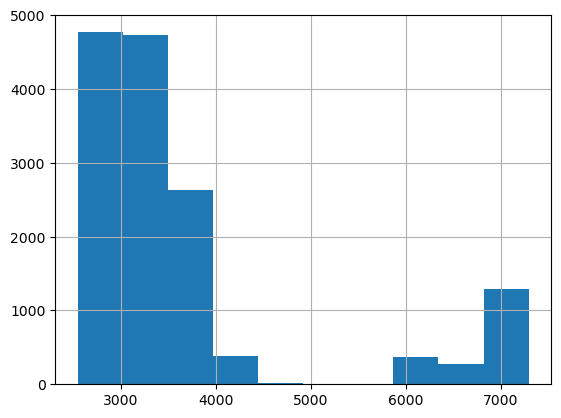

In [7]:
df.energy_mean.hist()

In [8]:
X = np.array(df.loc[:, ~df.columns.isin(['energy_mean', 'log', 'energy_shift', 'TCH_CONGESTION', 'TCH_BLOCKING'])])
y = np.array(df.loc[:, df.columns == 'energy_mean'])

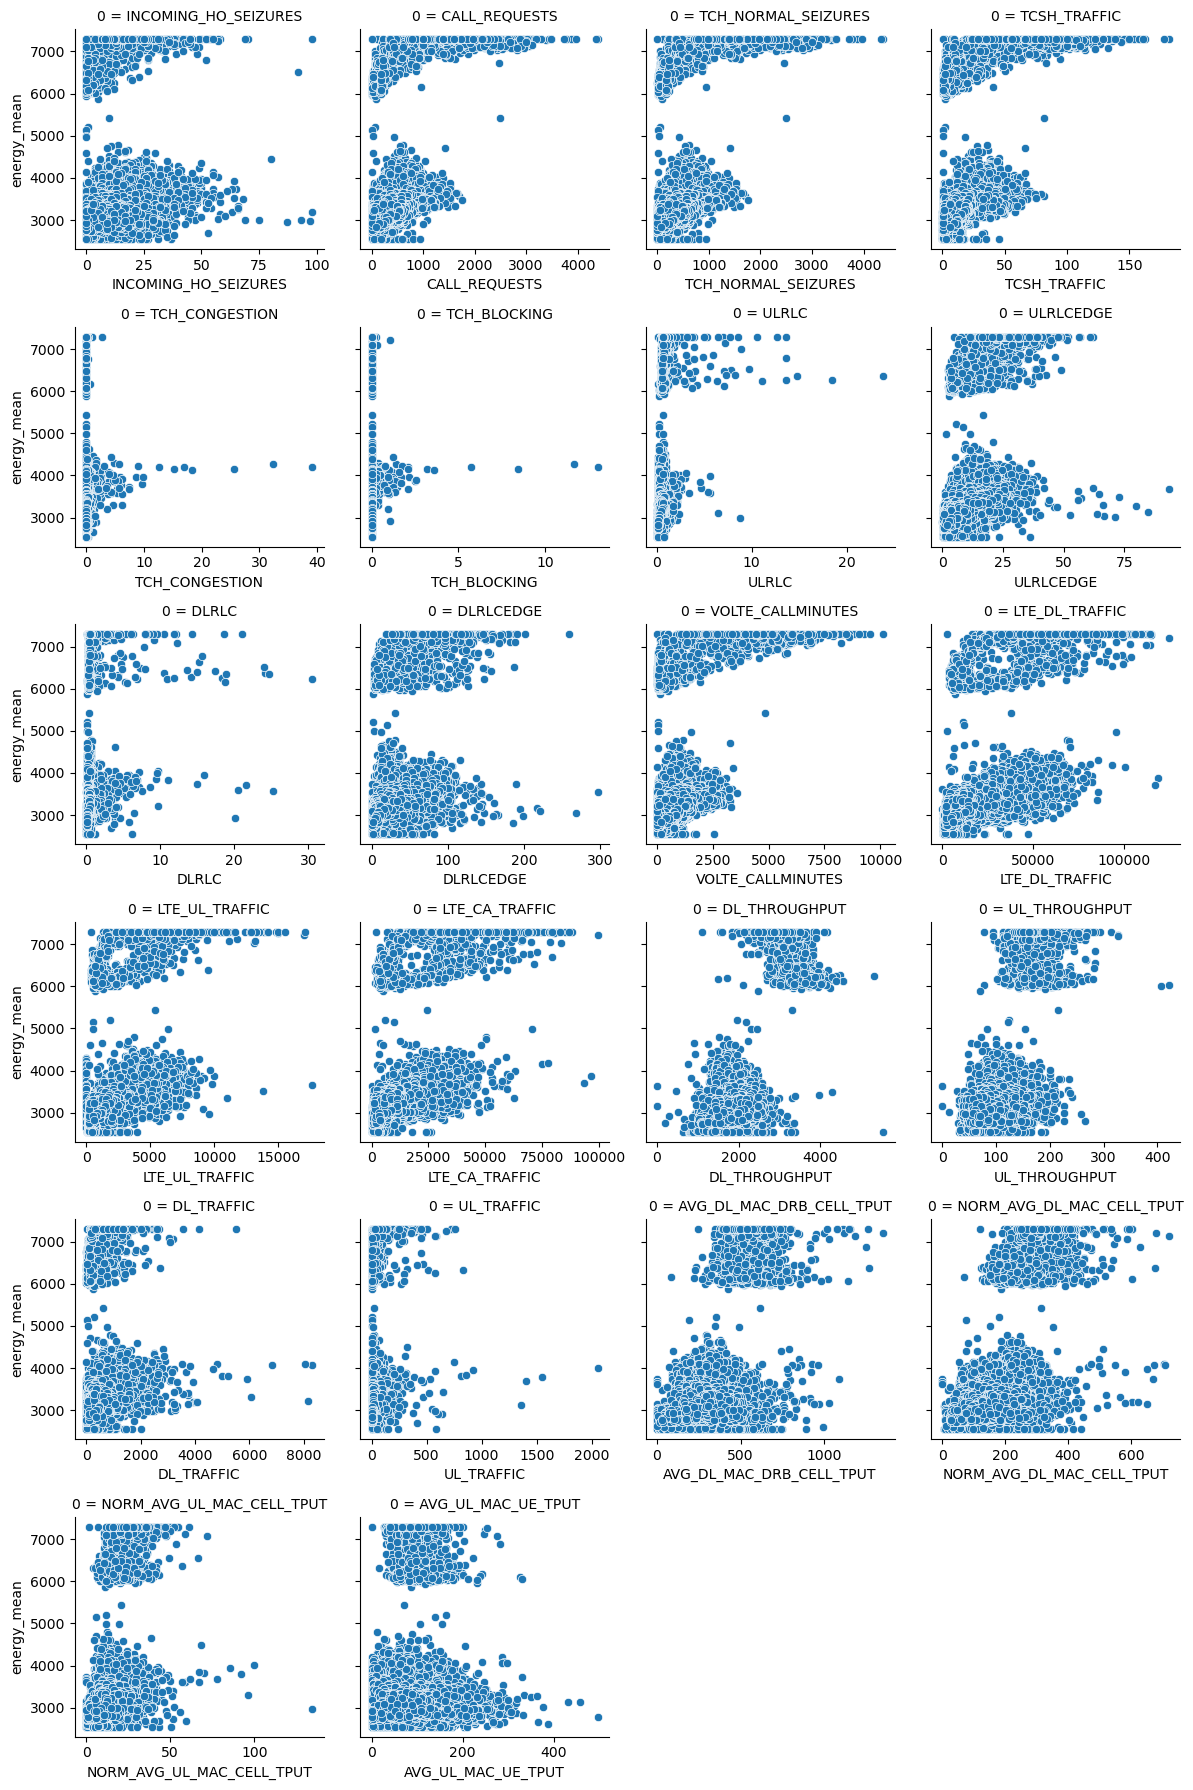

In [9]:
x_vars = df.columns[3:]
g = sns.FacetGrid(pd.DataFrame(x_vars), col=0, col_wrap=4, sharex=False)
for ax, x_var in zip(g.axes, x_vars):
    sns.scatterplot(data=df, x=x_var, y='energy_mean', ax=ax)
g.tight_layout()

Text(0.5, 1.0, 'Lower Triangle Correlation Matrix')

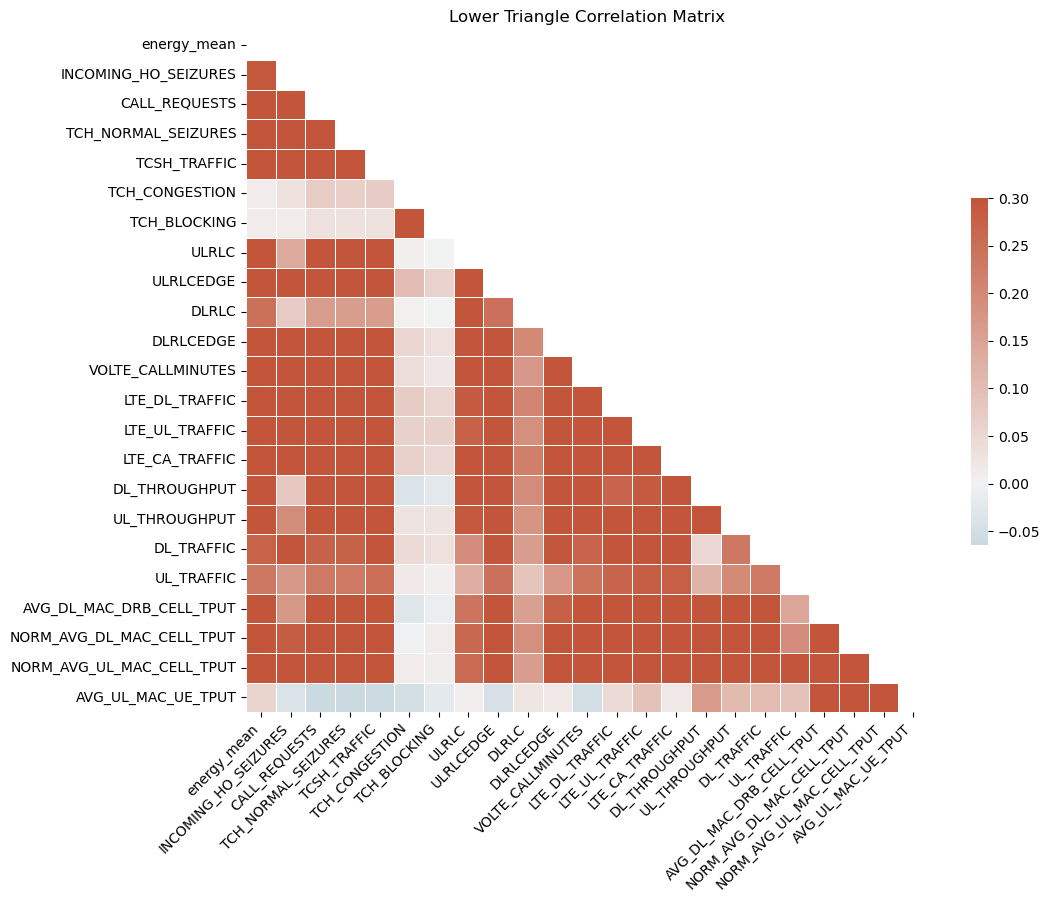

In [10]:
# Compute the correlation matrix
corr = df.loc[:,~df.columns.isin(['PERIOD_START_TIME', 'ID', 'log', 'energy_shift'])].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

for label in ax.get_xticklabels():
    label.set_ha("right")
    label.set_rotation(45)
    
ax.set_title("Lower Triangle Correlation Matrix")

In [11]:
score_list = []
mse_list = []
train_indx, test_indx = next(KFold(n_splits=5).split(X, y))
X_test, y_test = X[test_indx], np.ravel(y[test_indx])
for train_indx_s, val_indx in ShuffleSplit(n_splits=5, test_size=0.2).split(X[train_indx], y[train_indx]):
    X_train, X_val, y_train, y_val = X[train_indx_s], X[val_indx], np.ravel(y[train_indx_s]), np.ravel(y[val_indx])

    model = RandomForestRegressor(bootstrap=False, max_depth=90, max_features='sqrt', n_estimators=1400, n_jobs=-1)
    model.fit(X_train[:,2:], y_train)
    score = model.score(X_test[:,2:], y_test)
    score_list.append(score)
    print(f'{model.__class__.__name__}:{score}')
    mse = mean_squared_error(y_test, model.predict(X_test[:,2:]), squared=False)
    mse_list.append(mse)
    print(f'{model.__class__.__name__}:MSE:{mse}')
    break

print(np.mean(score_list))
print(np.mean(mse_list))

RandomForestRegressor:0.9626224570974995
RandomForestRegressor:MSE:71.377548384067
0.9626224570974995
71.377548384067


In [130]:
import pickle
pickle.dump(model, open('rfr.pickle', 'wb'))

In [125]:
base_model_r2 = 0.9811068771401859
base_model_mse = 183.2929744205186

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = [1.0, 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf_random = RandomizedSearchCV(estimator = RandomForestRegressor(n_jobs = -1), param_distributions = random_grid, n_iter = 400, cv = 3, verbose=2, n_jobs = 1)
# Fit the random search model
# rf_random.fit(X[train_indx], np.ravel(y[train_indx]))

with open('out/output.txt', 'a') as file:
    # file.write(str(rf_random.best_estimator_))
    pass

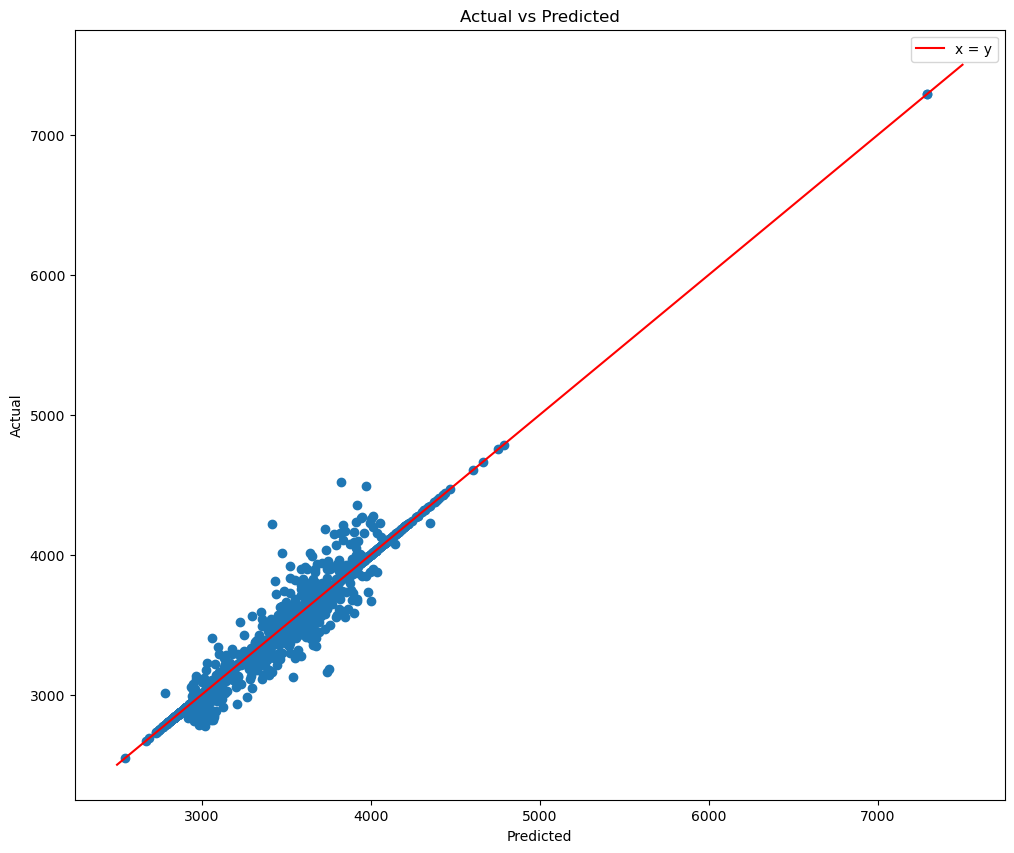

In [126]:
lin = np.linspace(2500, 7500)
fig, ax = plt.subplots()
fig.set_size_inches((12,10))
ax.scatter(model.predict(X_test[:,2:]), y_test)
ax.plot(lin, lin, color='r', label='x = y')
ax.set_ylabel("Actual")
ax.set_xlabel("Predicted")
ax.set_title("Actual vs Predicted")
ax.legend()

In [127]:
X_train.shape

(9256, 22)

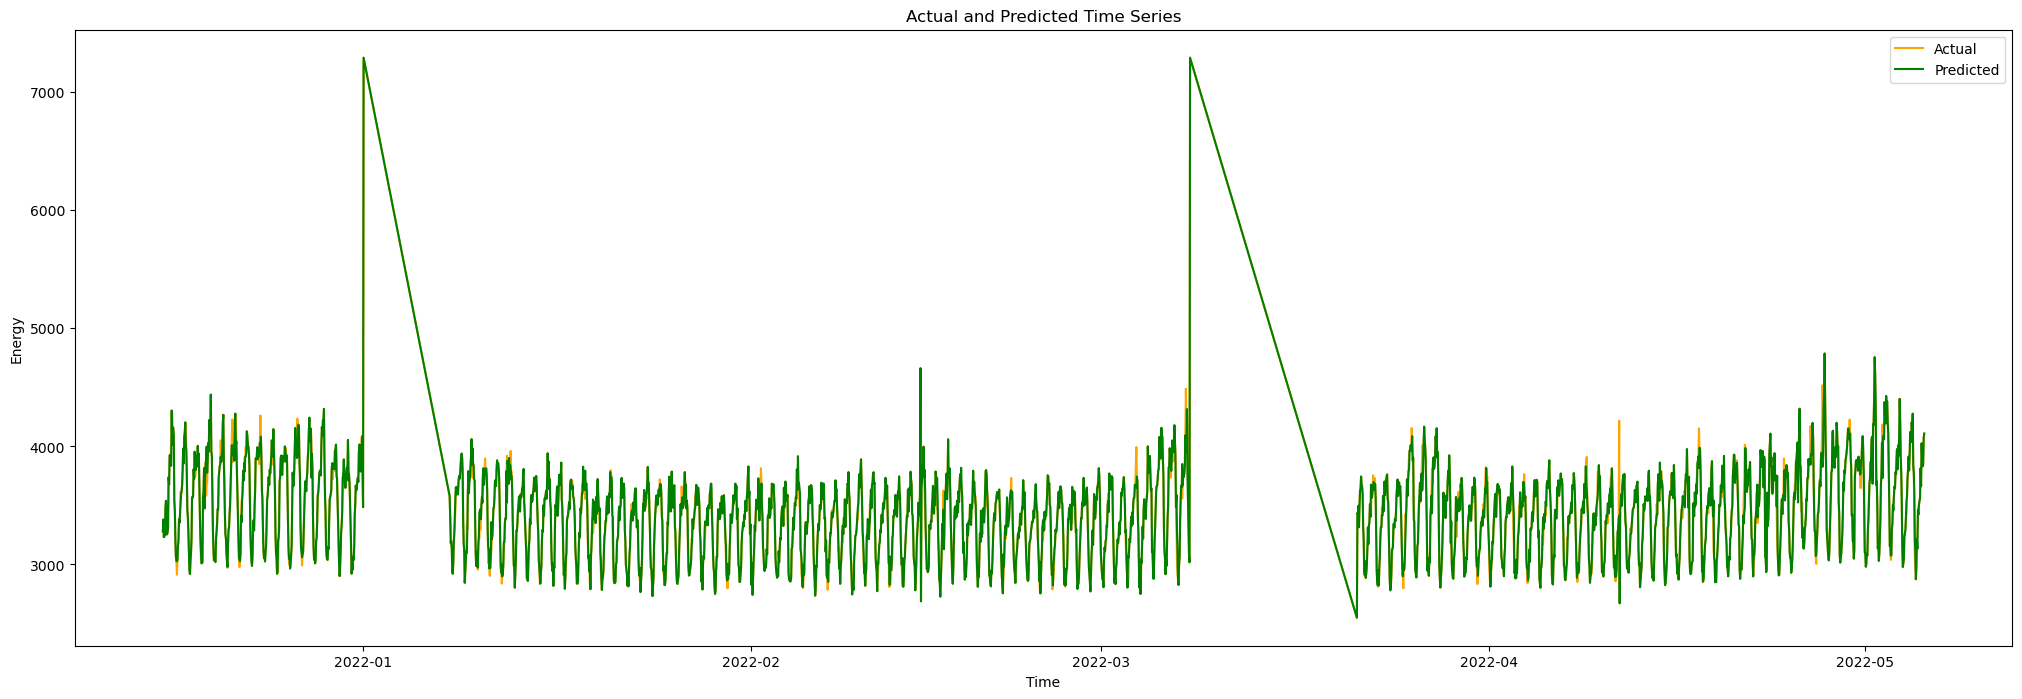

In [128]:
fig, ax = plt.subplots()
fig.set_size_inches((25, 8))
ax.set_ylabel('Energy')
ax.set_xlabel('Time')
ax.plot(X_test[:,1], y_test, color='orange', label='Actual')
ax.plot(X_test[:,1], model.predict(X_test[:,2:]), color='green', label='Predicted')
ax.set_title('Actual and Predicted Time Series')
ax.legend()

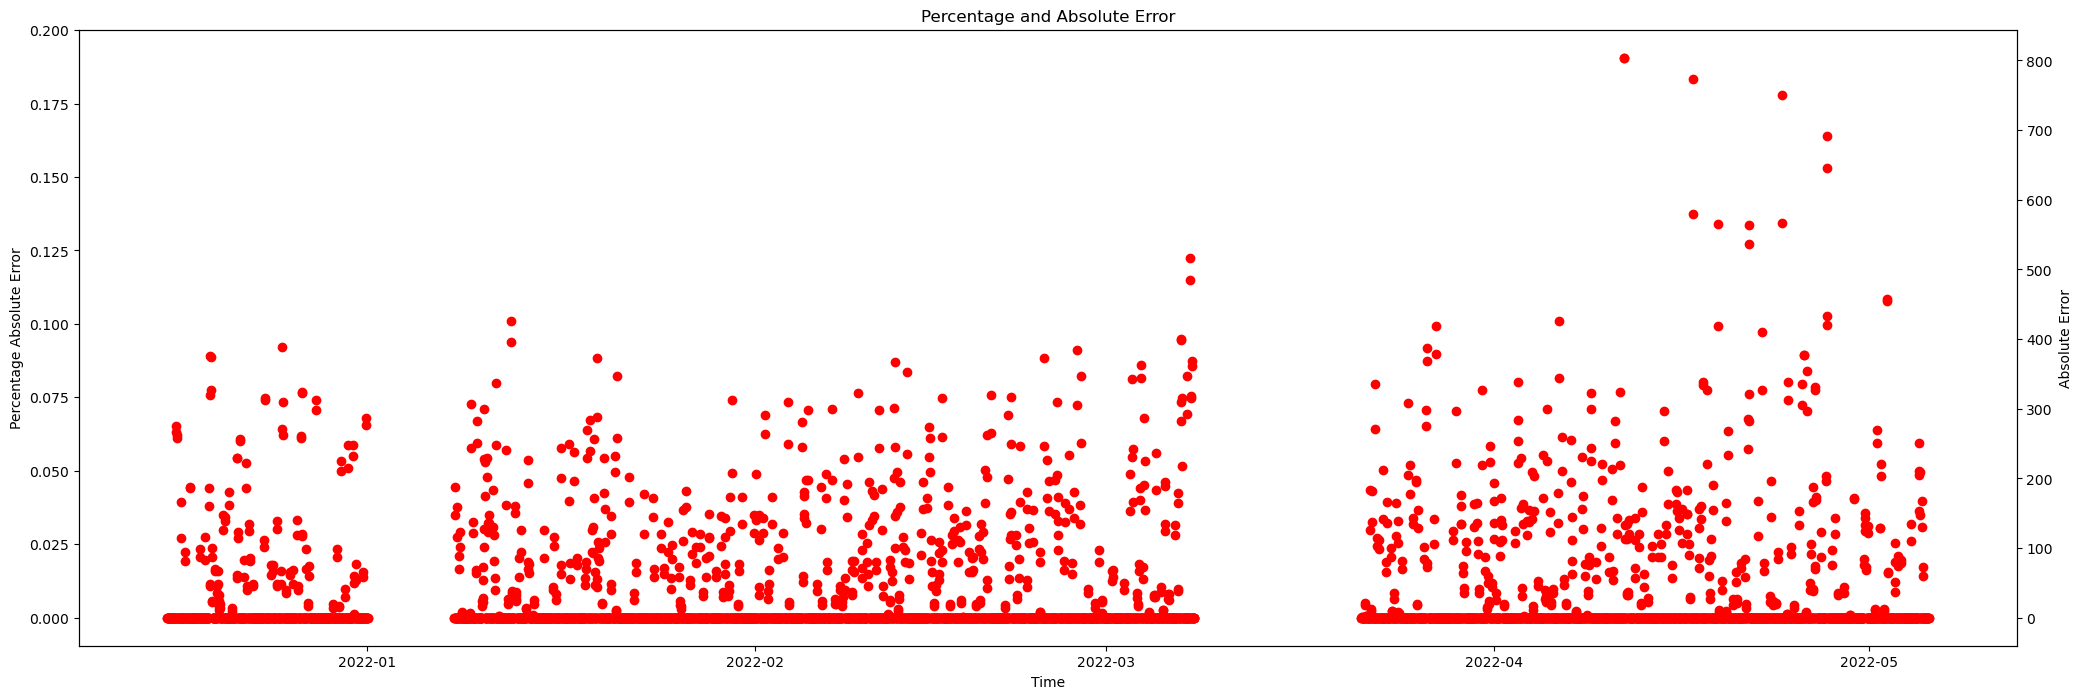

In [129]:
fig, ax = plt.subplots()
fig.set_size_inches((25,8))
ax.scatter(X_test[:,1],
           np.abs(model.predict(X_test[:,2:])-y_test)/y_test,
           color='red',
           marker='o')
ax.set_xlabel("Time")
ax.set_ylabel("Percentage Absolute Error")

ax2 = ax.twinx()
ax2.scatter(X_test[:,1],
           np.abs(model.predict(X_test[:,2:])-y_test),
           color='red',
           marker='o')
ax2.set_ylabel("Absolute Error")
ax.set_title("Percentage and Absolute Error")
plt.show()

In [427]:
synth = pd.read_csv('cosmote_synthetic_2022.csv', index_col=['ID', 'PERIOD_START_TIME'], parse_dates=['PERIOD_START_TIME'], dtype={'ID':np.int64})

energy = df.copy()
energy.ID = energy.ID.astype(np.int64)
energy = energy.set_index(['ID', 'PERIOD_START_TIME'])
energy = energy.iloc[:, 0]

synth_energy = synth.join(energy, how='left')
synth_energy = synth_energy.dropna()
synth_energy = synth_energy.sort_values(by=['ID', 'PERIOD_START_TIME'])
synth_energy = synth_energy.reset_index()

X_synth = np.array(synth_energy.loc[:, ~synth_energy.columns.isin(['energy_mean', 'log', 'energy_shift', 'TCH_CONGESTION', 'TCH_BLOCKING'])])
y_synth = np.array(synth_energy.loc[:, synth_energy.columns == 'energy_mean'])

In [434]:
synth_energy['pred'] = model.predict(X_synth[:,2:])

mean_squared_error(y_synth, model.predict(X_synth[:,2:]), squared=False)

synth_energy['pred_diff'] = synth_energy['energy_mean'] - synth_energy['pred']

In [435]:
synth_energy

,ID,PERIOD_START_TIME,INCOMING_HO_SEIZURES,CALL_REQUESTS,TCH_NORMAL_SEIZURES,TCSH_TRAFFIC,TCH_CONGESTION,TCH_BLOCKING,ULRLC,ULRLCEDGE,...,UL_THROUGHPUT,DL_TRAFFIC,UL_TRAFFIC,AVG_DL_MAC_DRB_CELL_TPUT,NORM_AVG_DL_MAC_CELL_TPUT,NORM_AVG_UL_MAC_CELL_TPUT,AVG_UL_MAC_UE_TPUT,energy_mean,pred,pred_diff
0,89,2022-01-01 00:00:00,5.676471,378.852941,378.029412,17.888824,0.082059,0.005294,0.858235,17.035588,...,182.557838,946.187568,57.545135,583.393784,347.030000,23.278108,88.414324,7273.466667,3837.959307,3435.507360
1,89,2022-01-01 01:00:00,3.176471,162.882353,162.470588,8.745882,0.000000,0.000000,0.784412,16.270000,...,181.361081,741.296757,28.418919,609.729189,342.424865,22.914865,97.412973,6805.866667,3619.848806,3186.017861
2,89,2022-01-01 02:00:00,0.382353,93.705882,93.500000,4.326765,0.000000,0.000000,0.871471,15.216471,...,177.063784,657.945676,27.388378,635.185135,345.475946,22.691892,101.957568,6618.533333,3208.240488,3410.292845
3,89,2022-01-01 03:00:00,0.235294,66.676471,66.500000,2.562353,0.000000,0.000000,1.183824,12.648235,...,178.165946,389.668108,16.307838,599.942703,306.344595,20.119189,99.924054,6406.666667,3262.405116,3144.261551
4,89,2022-01-01 04:00:00,0.500000,52.382353,52.352941,1.476765,0.000000,0.000000,1.067941,7.756176,...,183.489459,238.392162,9.900270,623.241622,292.862162,19.008649,108.312432,6243.733333,3307.791957,2935.941376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12922,2909,2022-03-07 19:00:00,15.057143,920.971429,919.628571,44.705429,0.067714,0.000000,0.383143,14.442000,...,107.846757,500.436486,17.195946,177.656216,111.104324,10.401081,58.856757,3561.714286,3393.827917,167.886369
12923,2909,2022-03-07 20:00:00,15.657143,861.257143,859.971429,45.157714,0.108286,0.000000,0.396000,12.552000,...,103.796757,504.267297,20.262432,160.021351,104.582162,11.715405,64.853784,3501.857143,3380.091105,121.766037
12924,2909,2022-03-07 21:00:00,15.428571,607.428571,606.514286,33.917143,0.014286,0.000000,0.394000,9.871429,...,104.855946,470.771081,20.517568,163.948649,100.363784,10.589459,65.677568,3449.857143,3388.812394,61.044749
12925,2909,2022-03-07 22:00:00,11.742857,342.057143,341.514286,22.788571,0.002286,0.000000,0.315143,9.893429,...,105.060541,550.105946,25.379730,172.728919,113.204324,11.434054,69.563243,3244.946429,3420.245027,-175.298599


In [436]:
synth_energy.to_csv('data/synthetic_energy_predictions_2022.csv', index=False)